# Imports And Variables

In [1]:
import json
import re
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:
# Emoji regex pattern
emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]")
# Keys of the data
keys = ['input', 'input_en', 'output', 'output_ge', 'summary']
# Reads the data as pandas dataframe
with open('masked_data.csv', 'r', encoding='utf-8') as f:
    data = pd.read_csv(f)

# Statistic Functions

In [3]:
def stat_create(pat: re, keys: list, name: str):
  """ Calculates occurences of specific pattern in data's keys values """
  for key in keys:
    data[key+"_"+name] = data[key].str.count(pat)
    data[key+"_"+name].fillna(0)


In [4]:
def print_stat(label:str, name: str, keys: list):
    print(label)
    for key in keys:
        print(f"{key}: {data[key+'_'+name].sum()}")

In [5]:
def stat_dict(keys:list, name:str)-> dict:
    ans = {}
    for key in keys:
        ans[key] = data[key+'_'+name].sum()
    return ans

# Masking Function

In [ ]:
def masking(pat: re, keys: list, replacment: str):
  """ Masking every occurences of specific pattern """
  for key in keys:
    data[key] = data[key].str.replace(pat, replacment)


# Emoji Statistics



In [6]:
emoji_stat = stat_create(emoji_pattern, keys,"emoji_count")

In [7]:
print_stat("Emojis:", "emoji_count", keys)
print()

Emojis:
input: 738
input_en: 646
output: 76.0
output_ge: 39.0
summary: 1385.0



# Masking Emojis



This part of the code masks all the occurences of the emojis

In [ ]:
masking(emoji_pattern, keys, "")

# Plotting

Emoji Pie Chart

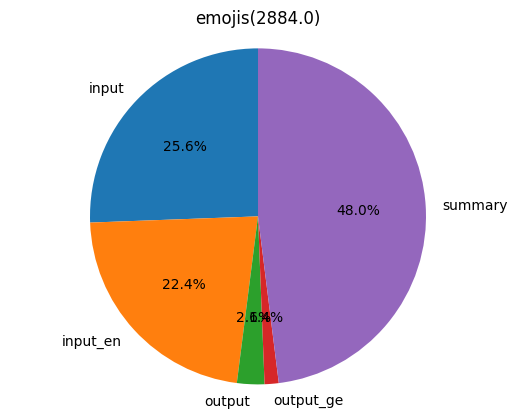

In [9]:
# Create a list of labels for the pie chart
emojis = stat_dict(keys=keys, name="emoji_count")
values_emojis = list(emojis.values())
emojis_title = f"emojis({sum(emojis.values())})" 
labels = list(emojis.keys())
# Create the pie chart for dict2 in the second subplot
plt.pie(values_emojis, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(emojis_title)
plt.show()